#独立成分分析

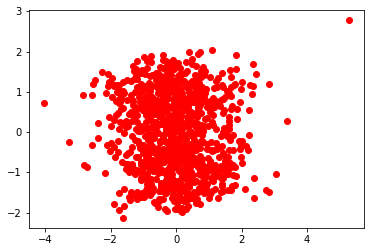

In [33]:
import numpy as np
from scipy.linalg import sqrtm
import math
import matplotlib.pyplot as plt


def generate_data(n=1000):
    global M, b
    x = np.concatenate([np.random.rand(n, 1), np.random.randn(n, 1)], axis=1)
    x[0, 1] = 6   # outlier
    x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)  # Standardization
    M = np.array([[1, 3], [5, 3]])
    x = x.dot(M.T)
    x = np.linalg.inv(sqrtm(np.cov(x, rowvar=False))).dot(x.T).T
    b  = np.random.uniform(0.08, -0.08, size= (2, 1))
    return x

X = generate_data()

for i in range(X.shape[0]):
  plt.scatter(generate_data()[i][0], generate_data()[i][1], color= 'red')
plt.show()

In [0]:
def g_s_3_dif(s):
  return 3 * (s**2)

def g_tan_dif (s):
  return 1 - (math.tanh(s))**2

def g_s_3 (s):
  return s**3

def g_tan (s):
  return math.tanh(s)

##球状化

In [47]:
#xの球状か
def kyujouka ():
  X_= []
  for i in range(X.shape[0]):
    x0, x1 = 0, 0
    n =X.shape[0]
    for j in range(X.shape[0]):
      x0 += X[j][0]
      x1 += X[j][1]
    x_ = (X[i] - [x0/n, x1/n])
    X_.append(x_.tolist())
  X_ = np.array(X_)
#   X_.append(x_)
  global X__
  X__ = []
  for l in range(X_.shape[0]):
    a = np.matmul(X_[l], X_[l].T)/n
    aa = 1/math.sqrt(a)
    x__ = aa*X_[l]
    X__.append(x__)
  return X__
X__ = kyujouka()
print((X__))

[array([29.51733323, 11.34579388]), array([-2.99491699, 31.48063646]), array([ 12.80903881, -28.91242855]), array([ 7.25263355, 30.77985228]), array([ 9.89245465, 30.03563452]), array([-31.62231457,  -0.17094196]), array([-31.40953902,  -3.66617763]), array([31.5016039 , -2.76567379]), array([-30.82869017,  -7.042149  ]), array([-19.92906455, -24.5526452 ]), array([-26.24544431, -17.64019991]), array([-17.00614924, -26.66066181]), array([-28.85073575,  12.94739537]), array([-28.47916292, -13.74544577]), array([-27.27777036, -15.99760121]), array([-31.01840151,   6.15294787]), array([-26.32544584,  17.52058508]), array([30.30361093, -9.03831647]), array([-17.64971615, -26.23904571]), array([-23.95615321,  20.64225578]), array([ 25.38193086, -18.86153721]), array([-30.03971436,   9.88005878]), array([13.664986  , 28.51785682]), array([ 24.33054404, -20.19961947]), array([ 20.8061153 , -23.81397838]), array([30.52075153,  8.27548946]), array([-11.72233919,  29.36982744]), array([  6.87986

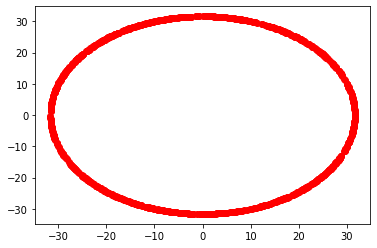

In [50]:

for i in range(X.shape[0]):
  plt.scatter(X__[i][0], X__[i][1], color= 'red')
plt.show()

##尖度

In [51]:
difference = 1
b  = np.random.uniform(0.08, -0.08, size= (1, 2))
print(b)
X__ = np.array(kyujouka())
while difference > 0.1:
  n = X.shape[0]
  sum_dif, sum_ = 0, 0
  for i in range(X.shape[0]):
    a = np.matmul(b, X__[i].T)
    g = g_s_3(a[0])
    gdif = g_s_3_dif(a[0])
    sum_dif += gdif
    sum_ += X__[i]*g
  b_before = b
  b = (sum_dif/n)*b - (sum_/n)
  b = b/math.sqrt(np.matmul(b, b.T)[0][0])
  difference = abs((b[0][0]) - abs(b_before[0][0]))

[[-0.06097038 -0.03281476]]


<BarContainer object of 50 artists>

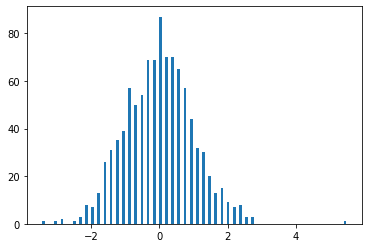

In [52]:
y =[]
for i in range(X.shape[0]):
  a = np.matmul(b, X[i].T)
  y.append(a[0])
aa = np.histogram(y, bins = 50)
a_bins = aa[1]
a_hist = aa[0]
X1 = []
for i in range(1, len(a_bins)):
    X1.append((a_bins[i-1]+a_bins[i])/2)
plt.bar(X1,a_hist, width=0.08)

##tanh(s)

In [53]:
difference = 1
b  = np.random.uniform(0.08, -0.08, size= (1, 2))
print(b)
X__ = np.array(kyujouka())
while difference > 0.1:
  n = X.shape[0]
  sum_dif, sum_ = 0, 0
  for i in range(X.shape[0]):
    a = np.matmul(b, X__[i].T)
    g = g_tan(a[0])
    gdif = g_tan_dif(a[0])
    sum_dif += gdif
    sum_ += X__[i]*g
  b_before = b
  b = (sum_dif/n)*b - (sum_/n)
  print(np.matmul(b, b.T)[0][0], b)
  b = b/math.sqrt(np.matmul(b, b.T)[0][0])
  print(b)
  difference = abs((b[0][0]) - abs(b_before[0][0]))

  print(difference)

[[ 0.01422308 -0.03098294]]
218.29700477878902 [[-5.72412426 13.62099138]]
[[-0.38742279  0.92190215]]
0.401645867130871
473.50180013832636 [[  7.30600539 -20.49692868]]
[[ 0.33575244 -0.94195027]]
0.05167035505139089


(array([ 5, 16, 14, 23, 23, 20, 21, 22, 31, 26, 20, 16, 31, 25, 23, 24, 14,
       20, 22, 21, 19, 16, 22, 16, 18, 21, 22, 25, 20, 23, 22, 22, 25, 22,
       13, 19, 25, 17, 30, 17, 24, 17, 22, 27, 25, 13, 16, 11, 12,  2]), array([-1.78452816, -1.71119521, -1.63786225, -1.56452929, -1.49119634,
       -1.41786338, -1.34453043, -1.27119747, -1.19786452, -1.12453156,
       -1.05119861, -0.97786565, -0.90453269, -0.83119974, -0.75786678,
       -0.68453383, -0.61120087, -0.53786792, -0.46453496, -0.391202  ,
       -0.31786905, -0.24453609, -0.17120314, -0.09787018, -0.02453723,
        0.04879573,  0.12212868,  0.19546164,  0.2687946 ,  0.34212755,
        0.41546051,  0.48879346,  0.56212642,  0.63545937,  0.70879233,
        0.78212528,  0.85545824,  0.9287912 ,  1.00212415,  1.07545711,
        1.14879006,  1.22212302,  1.29545597,  1.36878893,  1.44212189,
        1.51545484,  1.5887878 ,  1.66212075,  1.73545371,  1.80878666,
        1.88211962]))


<BarContainer object of 50 artists>

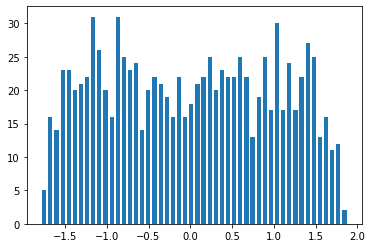

In [55]:
y =[]
for i in range(X.shape[0]):
  a = np.matmul(b, X[i].T)
  y.append(a[0])
aa = np.histogram(y, bins =50)
print(aa)
a_bins = aa[1]
a_hist = aa[0]
X1 = []
for i in range(1, len(a_bins)):
    X1.append((a_bins[i-1]+a_bins[i])/2)
plt.bar(X1,a_hist, width=0.05)